In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
import pandas as pd
import numpy as np

original_output = pd.read_csv('/content/drive/MyDrive/DLC-IDS/Outputs/Original_Outputs.csv', sep=',', skiprows=[0], header=None)
#print(original_output.value_counts())
#print(original_output)
original = original_output.values.flatten()

current_output = pd.read_csv('/content/drive/MyDrive/DLC-IDS/Outputs/Current_Output.csv', sep=',', skiprows=[0], header=None)
current_output = current_output.replace(0, 'Dos')
current_output = current_output.replace(1, 'Probe')
current_output = current_output.replace(2, 'R2L')
current_output = current_output.replace(4, 'normal')
current_output = current_output.replace(3, 'U2R')
#print(current_output.value_counts())
#print(current_output)
current = current_output.values.flatten()

sdv_output = pd.read_csv('/content/drive/MyDrive/DLC-IDS/Outputs/CR.csv', sep=',', skiprows=[0], header=None)
sdv_output = sdv_output.replace(1, 'R2L')
sdv_output = sdv_output.replace(2, 'normal')
sdv_output = sdv_output.replace(0, 'Other')
#print(sdv_output.value_counts())
#print(sdv_output)
CR = sdv_output.values.flatten()

sdv_output_binary = pd.read_csv('/content/drive/MyDrive/DLC-IDS/Outputs/CN.csv', sep=',', skiprows=[0], header=None)
#print(sdv_output_binary.value_counts())
#print(sdv_output_binary)
CN = sdv_output_binary.values.flatten()
#print(sdv_binary)

sdv_output = pd.read_csv('/content/drive/MyDrive/DLC-IDS/Outputs/CD.csv', sep=',', skiprows=[0], header=None)
sdv_output = sdv_output.replace(1, 'Dos')
sdv_output = sdv_output.replace(2, 'normal')
sdv_output = sdv_output.replace(0, 'Other')
#print(sdv_output.value_counts())
#print(sdv_output)
CD = sdv_output.values.flatten()

sdv_output = pd.read_csv('/content/drive/MyDrive/DLC-IDS/Outputs/CP.csv', sep=',', skiprows=[0], header=None)
sdv_output = sdv_output.replace(1, 'Probe')
sdv_output = sdv_output.replace(2, 'normal')
sdv_output = sdv_output.replace(0, 'Other')
#print(sdv_output.value_counts())
#print(sdv_output)
CP = sdv_output.values.flatten()

collective_decision = current


for i in range(len(current)):
  if CD[i] == 'Dos':
    if current[i] != 'Dos':
      collective_decision[i] = 'Dos'

for i in range(len(current)):
  if CR[i] == 'R2L':
    if current[i] == 'normal':
      collective_decision[i] = 'R2L'

for i in range(len(current)):
  if CP[i] == 'Probe':
    if current[i] != 'Probe':
      collective_decision[i] = 'Probe'

for i in range(len(current)):
  if CN[i] == 0:
    collective_decision[i] = 'normal'
'''
for i in range (len(current)):
  if current[i] == 'normal':
    if CR[i] == 'R2L':
      if CN[i] != 1:
        collective_decision[i] = 'R2L'
'''
print(collective_decision)

matches = 0

for i in range (len(original)):
  if original[i] == collective_decision[i]:
    matches += 1

print((matches*100)/22544)

['Dos' 'Dos' 'R2L' ... 'Dos' 'R2L' 'Probe']
83.47232079489


In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

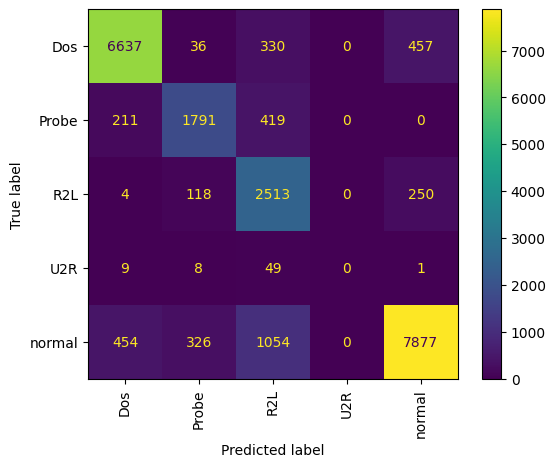

In [41]:
# Calculate the confusion matrix
labels = np.unique(np.concatenate((original, collective_decision)))
cm = confusion_matrix(original, collective_decision, labels=labels)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation='vertical')

# Show the plot
plt.show()


In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np

# Ensure that labels are consistent and all exist in both the actual and predicted output
labels = np.unique(np.concatenate((original, collective_decision)))
print(labels)

# Calculate Precision, Recall, F1-score, and Accuracy
precision = precision_score(original, collective_decision, average='weighted', labels=labels, zero_division=0)
recall = recall_score(original, collective_decision, average='weighted', labels=labels, zero_division=0)
f1 = f1_score(original, collective_decision, average='weighted', labels=labels, zero_division=0)
accuracy = accuracy_score(original, collective_decision)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Accuracy: {accuracy}")


['Dos' 'Probe' 'R2L' 'U2R' 'normal']
Precision: 0.8535412543513285
Recall: 0.8347232079489
F1-score: 0.8387608824076137
Accuracy: 0.8347232079489


Confusion Matrix:
 [[6637   36  330    0  457]
 [ 211 1791  419    0    0]
 [   4  118 2513    0  250]
 [   9    8   49    0    1]
 [ 454  326 1054    0 7877]]


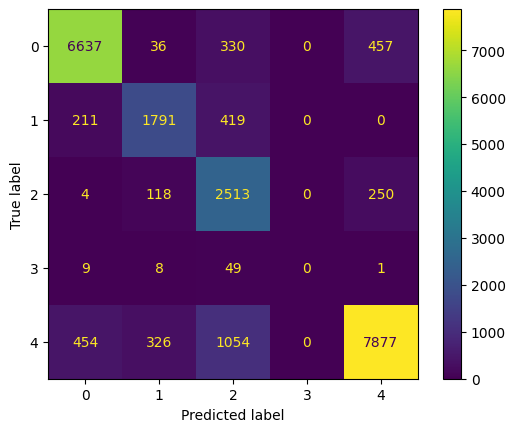

In [39]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#confusion_matrix(original, collective_decision)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# compute the confusion matrix
cm = confusion_matrix(original, collective_decision)
# create a ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay(cm)
# plot the confusion matrix
print("Confusion Matrix:\n", cm)
cm_display.plot()
plt.show()

In [40]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Assuming 'original' and 'collective_decision' are already defined from the previous code

# Compute the confusion matrix
cm = confusion_matrix(original, collective_decision, labels=['normal', 'Dos', 'Probe', 'R2L'])

# Extract TN, FP, FN, TP for each class (assuming binary classification for each class against others)
tn = cm[0,0]
fp = np.sum(cm[0,1:])
fn = np.sum(cm[1:,0])
tp = np.sum(cm[1:,1:])

# Calculate FPR and FNR
fpr = fp / (fp+tn) if (fp+tn) !=0 else 0
fnr = fn / (tp + fn) if (tp+fn) != 0 else 0


# Calculate precision, recall, and F1-score for each class
precision = precision_score(original, collective_decision, average=None, labels=['normal', 'Dos', 'Probe', 'R2L'])
recall = recall_score(original, collective_decision, average=None, labels=['normal', 'Dos', 'Probe', 'R2L'])
f1 = f1_score(original, collective_decision, average=None, labels=['normal', 'Dos', 'Probe', 'R2L'])

print(f"False Positive Rate (FPR): {fpr}")
print(f"False Negative Rate (FNR): {fnr}")
print("Precision (per class):", precision)
print("Recall (per class):", recall)
print("F1-score (per class):", f1)

# Calculate macro-average precision, recall, and F1-score
macro_precision = precision_score(original, collective_decision, average='macro', labels=['normal', 'Dos', 'Probe', 'R2L'])
macro_recall = recall_score(original, collective_decision, average='macro', labels=['normal', 'Dos', 'Probe', 'R2L'])
macro_f1 = f1_score(original, collective_decision, average='macro', labels=['normal', 'Dos', 'Probe', 'R2L'])

print(f"\nMacro-average Precision: {macro_precision}")
print(f"Macro-average Recall: {macro_recall}")
print(f"Macro-average F1-score: {macro_f1}")

# Calculate weighted-average precision, recall, and F1-score
weighted_precision = precision_score(original, collective_decision, average='weighted', labels=['normal', 'Dos', 'Probe', 'R2L'])
weighted_recall = recall_score(original, collective_decision, average='weighted', labels=['normal', 'Dos', 'Probe', 'R2L'])
weighted_f1 = f1_score(original, collective_decision, average='weighted', labels=['normal', 'Dos', 'Probe', 'R2L'])

print(f"\nWeighted-average Precision: {weighted_precision}")
print(f"Weighted-average Recall: {weighted_recall}")
print(f"Weighted-average F1-score: {weighted_f1}")


False Positive Rate (FPR): 0.18885799608691176
False Negative Rate (FNR): 0.05538148206172646
Precision (per class): [0.91753058 0.90731374 0.785871   0.57571592]
Recall (per class): [0.811142   0.88967828 0.73977695 0.87105719]
F1-score (per class): [0.86106253 0.89840948 0.76212766 0.69324138]

Macro-average Precision: 0.7966078084095827
Macro-average Recall: 0.8279136080356516
Macro-average F1-score: 0.8037102604196259

Weighted-average Precision: 0.8560855113269721
Weighted-average Recall: 0.8372113716243271
Weighted-average F1-score: 0.8412610816833761
